## Loading Libraries

In [ ]:
import numpy as np
from numpy import *
from time import sleep
import os
import errno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import tarfile
import pickle
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

## Data Extraction

In [75]:
#my_tar = tarfile.open('cifar-10-python.tar.gz')
#my_tar.extractall('./image_classification') # specify which folder to extract to
#my_tar.close()

In [76]:
def silent_remove(filename):
    try:
        os.remove(filename)
    except OSError as e:  # this would be "except OSError, e:" before Python 2.6
        if e.errno != errno.ENOENT:  # errno.ENOENT = no such file or directory
            raise  # re-raise exception if a different error occurred



def unpickle(file):
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d


def read_data(folder):
    x_data_temp = []
    y_data_temp = []
    x_test_data_temp = []
    y_test_data_temp = []
    # We don't use numpy's vstack here as that would be wasteful, because every time you do a vstack, numpy would end
    # up copying the whole array to a new location. Hence we use a little trick to first store the data in a list and
    # then convert it to an numpy array

    for file in os.listdir(folder):
        if file.endswith(".meta") or file.endswith(".html"):
            print("Ignoring html and meta files")
        elif "test_batch" in file:
            # test data file detected. we are gonna load it separately
            test_data_temp = unpickle(folder + "/" + file)
            x_test_data_temp.append(test_data_temp[b'data'])
            y_test_data_temp.append(test_data_temp[b'labels'])
        else:
            temp_data = unpickle(folder + "/" + file)
            x_data_temp.append(temp_data[b'data'])
            y_data_temp.append(temp_data[b'labels'])
    x_data = array(x_data_temp)
    y_data = array(y_data_temp)
    x_test_data = array(x_test_data_temp)
    y_test_data = array(y_test_data_temp)
    return [x_data, y_data, x_test_data, y_test_data]

## Data Processing

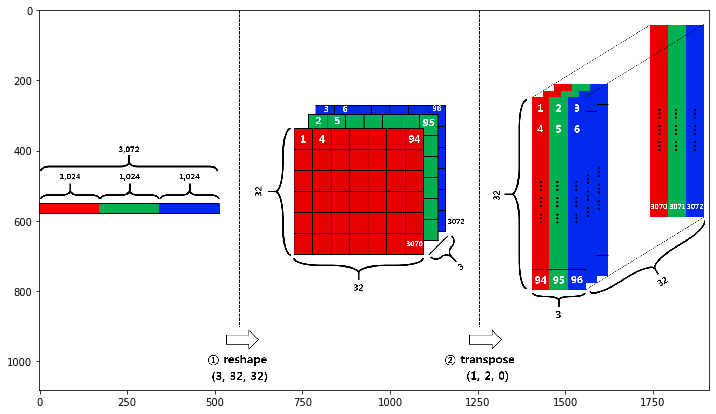

In [77]:
img = mpimg.imread('./reshaping_data.png') 
plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

In [78]:
X_train_temp, y_train_temp, X_test_temp, y_test_temp = read_data("./cifar-10-batches-py")

Ignoring html and meta files
Ignoring html and meta files


In [79]:
print('Current shape of training data is: ', X_train_temp.shape)
print('Current shape of training labels is: ', y_train_temp.shape)

Current shape of training data is:  (5, 10000, 3072)
Current shape of training labels is:  (5, 10000)


In [80]:
X_train_temp = X_train_temp.reshape(X_train_temp.shape[0] * X_train_temp.shape[1], X_train_temp.shape[2])
y_train_temp = y_train_temp.reshape(y_train_temp.shape[0] * y_train_temp.shape[1])

# Similarly for X_test_temp and y_test_data

X_test = X_test_temp.reshape(X_test_temp.shape[0] * X_test_temp.shape[1], X_test_temp.shape[2])
y_test = y_test_temp.reshape(y_test_temp.shape[0] * y_test_temp.shape[1])

print('Transformed shape of training data is: ',X_train_temp.shape)
print('Transformed shape of training labels is: ', y_train_temp.shape)

print('Transformed shape of training data is: ', X_test.shape)
print('Transformed shape of test labels is: ', y_test.shape)

Transformed shape of training data is:  (50000, 3072)
Transformed shape of training labels is:  (50000,)
Transformed shape of training data is:  (10000, 3072)
Transformed shape of test labels is:  (10000,)


## Exploratory Data Analysis

In [81]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [82]:
images = X_train_temp.reshape((len(X_train_temp), 3, 32, 32)).transpose(0, 2, 3, 1)
image_label = dict(zip(unique(y_train_temp), labels))
image_counts = unique(y_train_temp, return_counts=True)[1]

In [83]:
def display_stats():
    print('Total number of training images in dataset :', images.shape[0])
    print('')
    for i, j in image_label.items():
        print('Label Counts of {} : {} is {}'.format(i, j.upper(), image_counts[i]))  
display_stats()

Total number of training images in dataset : 50000

Label Counts of 0 : AIRPLANE is 5000
Label Counts of 1 : AUTOMOBILE is 5000
Label Counts of 2 : BIRD is 5000
Label Counts of 3 : CAT is 5000
Label Counts of 4 : DEER is 5000
Label Counts of 5 : DOG is 5000
Label Counts of 6 : FROG is 5000
Label Counts of 7 : HORSE is 5000
Label Counts of 8 : SHIP is 5000
Label Counts of 9 : TRUCK is 5000


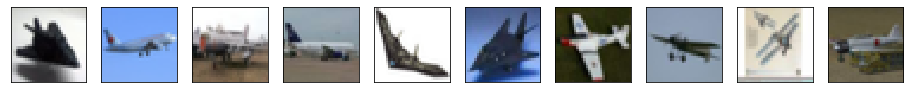

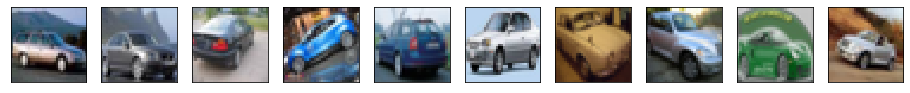

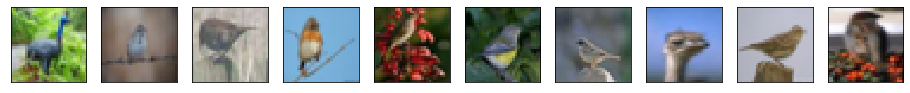

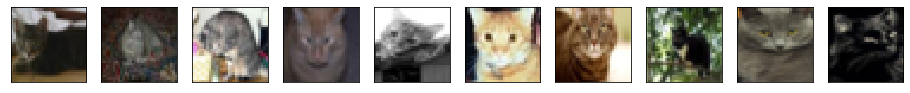

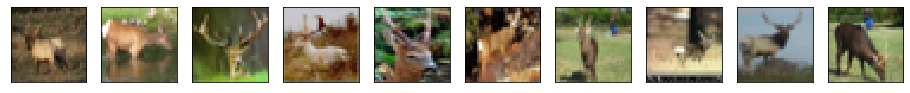

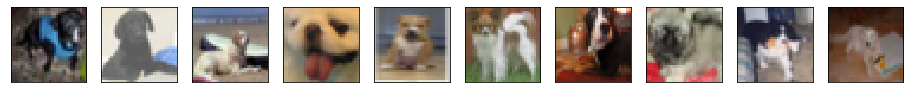

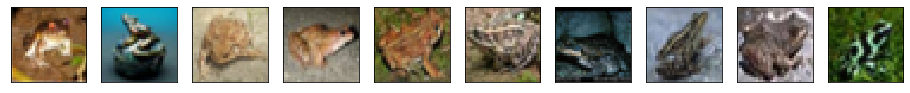

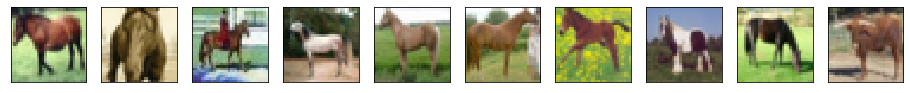

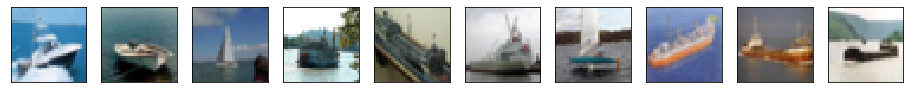

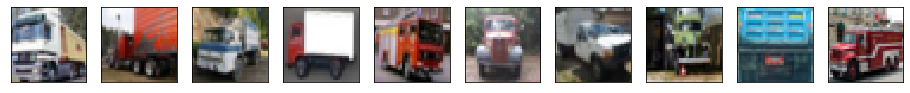

In [84]:
for i in range(len(labels)):
    arr = np.where(y_train_temp == i)[0]
    fig, axes = plt.subplots(1,10, figsize=(16,12))
    for j, k in enumerate(range(0, len(arr), 500)):
        axes[j].set_xticks([], [])
        axes[j].set_yticks([], [])
        axes[j].imshow(images[arr[k]])

Example of image 47976:
Pixels distribution for chosen image - Min Value: 11 and Max Value: 218
Shape of image array - Shape: (32, 32, 3)
Label for image - Label Id: 6 Name: frog


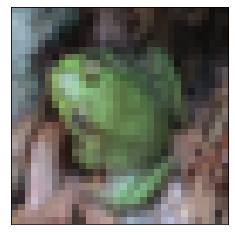

In [85]:
rand_image_index = random.randint(0, 50000)
sample_image = images[rand_image_index]
print('Example of image {}:'.format(rand_image_index))
print('Pixels distribution for chosen image - Min Value: {} and Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Shape of image array - Shape: {}'.format(sample_image.shape))
print('Label for image - Label Id: {} Name: {}'.format(y_train_temp[rand_image_index], image_label[y_train_temp[rand_image_index]]))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(sample_image) 
plt.show()

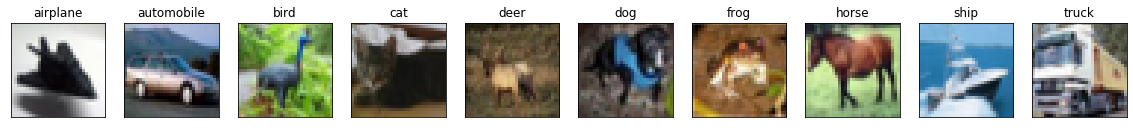

In [86]:
indices = []
for i in range(len(labels)):
    arr = np.where(y_train_temp == i)[0]
    indices.append(arr[0])
images_temp = X_train_temp[indices]
labels_temp = y_train_temp[indices]

fig, axes = plt.subplots(1,10, figsize=(20,18))
for ax, index in zip(axes.flatten(), indices):
    ax.set_title(image_label[y_train_temp[index]])
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.imshow(images[index])

In [87]:
def drop_color_array(channel):
    new_images = images[indices].copy()
    
    for image in images_temp:
        if channel == 'R':
            new_images[:, :, :, 0] = 0
        if channel == 'G':
            new_images[:, :, :, 1] = 0
        if channel == 'B':
            new_images[:, :, :, 2] = 0
   
    fig, axes = plt.subplots(1,10,figsize=(20,18))
    for ax, image, index in zip(axes.flatten(), new_images, indices):
        ax.set_title(image_label[y_train_temp[index]])
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        ax.imshow(image)
    return None

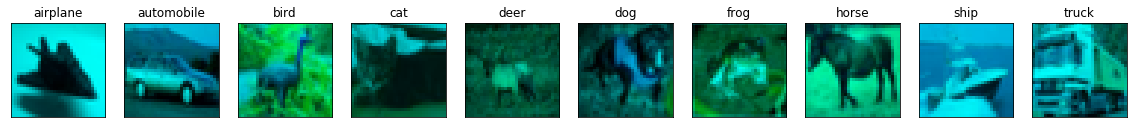

In [88]:
# removing red channel from images array 
drop_color_array('R')

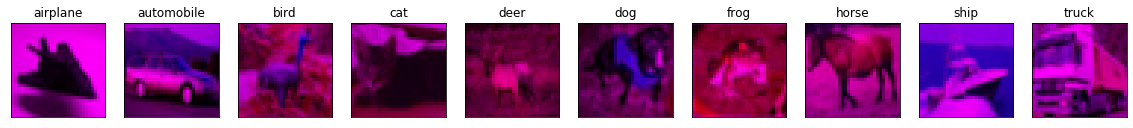

In [89]:
# removing green channel from images array 
drop_color_array('G')

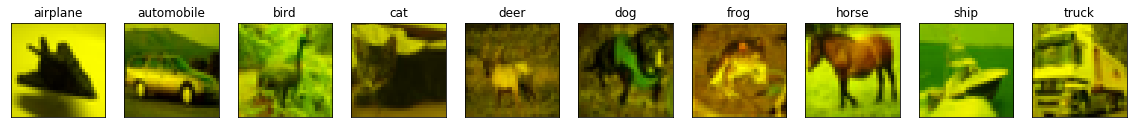

In [90]:
# removing blue channel from images array 
drop_color_array('B')

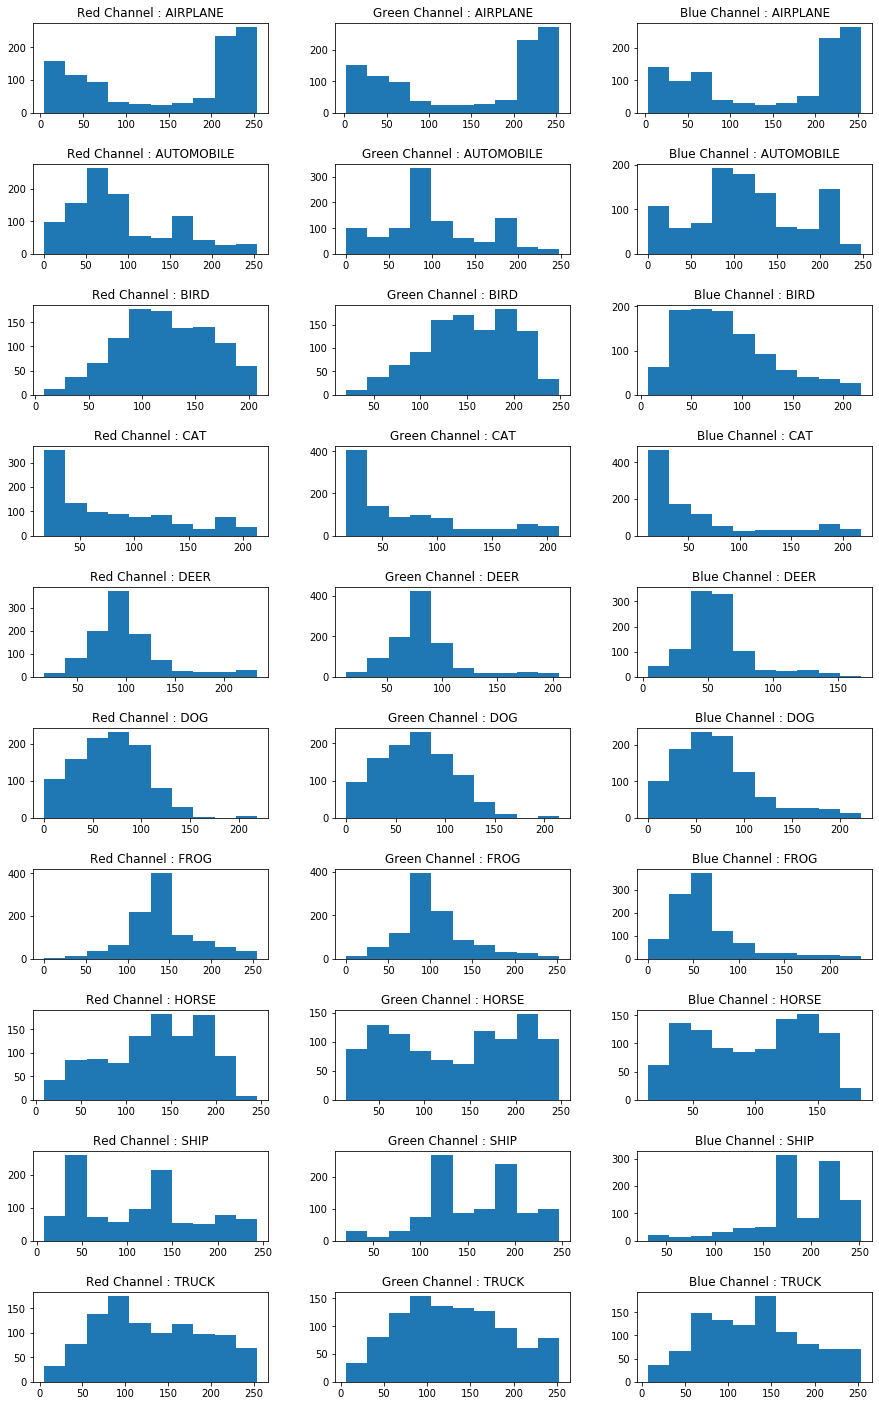

In [91]:
# histogram of channel distribution for selected images
def color_hist():
    new_images = images[indices].copy()
    fig, axes = plt.subplots(10,3, figsize=(13,20))
    fig.tight_layout(pad=3.0)
    for i, image, index in zip(range(len(indices)), new_images, indices):
        #for red channel
        axes[i][0].set_title('Red Channel : ' + image_label[y_train_temp[index]].upper())
        axes[i][0].hist(new_images[i, :, :, 0].reshape(32*32))
               
        #for red channel
        axes[i][1].set_title('Green Channel : ' + image_label[y_train_temp[index]].upper())
        axes[i][1].hist(new_images[i, :, :, 1].reshape(32*32))
                
        #for red channel
        axes[i][2].set_title('Blue Channel : '+ image_label[y_train_temp[index]].upper())
        axes[i][2].hist(new_images[i, :, :, 2].reshape(32*32))
color_hist()

In [92]:
# Splitting X and y in training and val data
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0, stratify=y_train_temp, shuffle=True)

# Model Building/Evaluation

## 1. LogisticRegression

In [93]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [94]:
#one-vs-all logistic model
logit = LogisticRegression(C = 1, solver = 'newton-cg')
clf_logit = OneVsRestClassifier(logit)
#clf_logit = clf_logit.fit(X_train_scaled, y_train)

In [95]:
#filename = 'clf_logit.pkl'
#pickle.dump(clf_logit, open(filename, 'wb'))

In [96]:
with open('./clf_logit.pkl','rb') as filename:
    clf_logit = pickle.load(filename)

In [97]:
y_train_pred_logit = clf_logit.predict(X_train_scaled)
print('Accuray score for Logistic one-vs-all model for training set is ', metrics.accuracy_score(y_train_pred_logit,y_train))

y_val_pred_logit = clf_logit.predict(X_val_scaled)
print('\nAccuray score for Logistic one-vs-all model for validation set is ', metrics.accuracy_score(y_val_pred_logit,y_val))

Accuray score for Logistic one-vs-all model for training set is  0.504125

Accuray score for Logistic one-vs-all model for validation set is  0.3919


## 2. DecisionTreeClassifier

In [98]:
#Decision Tree Classifier model
clf_dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_split = 80)
#clf_dtc.fit(X_train, y_train)

In [99]:
#filename = 'clf_dtc.pkl'
#pickle.dump(clf_dtc, open(filename, 'wb'))

In [101]:
with open('./clf_dtc.pkl','rb') as filename:
    clf_dtc = pickle.load(filename)

In [102]:
y_train_pred_dtc = clf_dtc.predict(X_train)
print('Accuray score for train set for Decision Tree Classifier is ', metrics.accuracy_score(y_train_pred_dtc,y_train))

y_val_pred_dtc = clf_dtc.predict(X_val)
print('\nAccuray score for validation set for Decision Tree Classifier is ', metrics.accuracy_score(y_val_pred_dtc,y_val))

Accuray score for train set for Decision Tree Classifier is  0.447025

Accuray score for validation set for Decision Tree Classifier is  0.3026


## Dimensionality Reduction using Principal Component Analysis

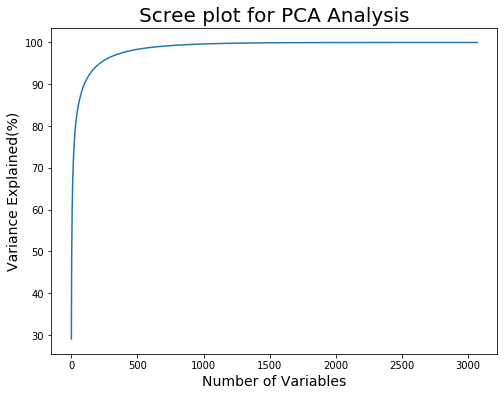

In [103]:
pca = PCA()
X_pca_train = pca.fit_transform(X_train)

var_ratio_exp = pca.explained_variance_ratio_.cumsum()
# Scree Plot
plt.figure(figsize=(8,6))
plt.xlabel('Number of Variables', fontsize=14, color='black')
plt.ylabel('Variance Explained(%)', fontsize=14, color='black')
plt.title ('Scree plot for PCA Analysis' ,fontsize=20, color='black')
plt.plot(range(len(var_ratio_exp)), var_ratio_exp * 100) #plot
plt.show()

In [104]:
k = np.where(var_ratio_exp*100 > 99)[0][1]

pca = PCA(n_components=k, whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


print('Transformed shape of training set : ', X_train_pca.shape)
print('Transformed shape of validation set : ', X_val_pca.shape)

Transformed shape of training set :  (40000, 657)
Transformed shape of validation set :  (10000, 657)


## 3. DecisionTreeClassifier (PCA data)

In [105]:
#Grid Search CV to find best parameters in DTC

dtc = DecisionTreeClassifier(random_state=0)

#Define the parameter values that should be searched

param_grid = {'criterion':('gini', 'entropy'), 'max_depth':[4,6,8,12],
              'min_samples_split':list(range(20, 100,20))}

# instantiate the grid
clf_dtc_grid = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
#clf_dtc_grid.fit(X_train_pca, y_train)

In [106]:
#filename = 'clf_dtc_grid.pkl'
#pickle.dump(clf_dtc_grid, open(filename, 'wb'))

In [107]:
with open('./clf_dtc_grid.pkl','rb') as filename:
    clf_dtc_grid = pickle.load(filename)

In [108]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print('Best mean accuray score obtained for Decision Tree Classifier on transformed training data is ', clf_dtc_grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print('\nBest parameters obtained for Decision Tree Classifier model are ', clf_dtc_grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print('\nBest model parameters obtained are ', clf_dtc_grid.best_estimator_)

Best mean accuray score obtained for Decision Tree Classifier on transformed training data is  0.29895

Best parameters obtained for Decision Tree Classifier model are  {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 80}

Best model parameters obtained are  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [109]:
y_pca_train_pred_dtc = clf_dtc_grid.predict(X_train_pca)
print('Accuray score for Decision Tree Classifier on transformed training data is ', metrics.accuracy_score(y_pca_train_pred_dtc,y_train))

y_pca_val_pred_dtc = clf_dtc_grid.predict(X_val_pca)
print('\nAccuray score for Decision Tree Classifier on transformed validation data is ', metrics.accuracy_score(y_pca_val_pred_dtc,y_val))

Accuray score for Decision Tree Classifier on transformed training data is  0.406425

Accuray score for Decision Tree Classifier on transformed validation data is  0.3038


## 4. RandomForestClassifier

In [110]:
clf_rfc = RandomForestClassifier(n_estimators = 500, max_depth= 12, min_samples_split = 60, 
                             criterion='entropy', random_state=0, verbose=False)

#clf_rfc.fit(X_train_pca, y_train)

In [111]:
#filename = 'clf_rfc.pkl'
#pickle.dump(clf_rfc, open(filename, 'wb'))

In [112]:
with open('./clf_rfc.pkl','rb') as filename:
    clf_rfc = pickle.load(filename)

In [113]:
y_pca_train_pred_rfc = clf_rfc.predict(X_train_pca)
print('Mean accuray score for Random Forest Classifier on transformed training data is ', metrics.accuracy_score(y_pca_train_pred_rfc,y_train))

y_pca_val_pred_rfc = clf_rfc.predict(X_val_pca)
print('\nMean accuray score for Random Forest Classifier on transformed validation data is ', metrics.accuracy_score(y_pca_val_pred_rfc,y_val))

Mean accuray score for Random Forest Classifier on transformed training data is  0.64315

Mean accuray score for Random Forest Classifier on transformed validation data is  0.4314


## 5. Gradient Boosting

In [114]:
clf_gbc = GradientBoostingClassifier(n_estimators=500, max_depth= 3, min_samples_split = 60, 
                                 random_state=0, verbose = True)

#clf_gbc.fit(X_train_pca,y_train)

In [115]:
#filename = 'clf_gbc.pkl'
#pickle.dump(clf_gbc, open(filename, 'wb'))

In [116]:
with open('./clf_gbc.pkl','rb') as filename:
    clf_gbc = pickle.load(filename)

In [117]:
y_pca_train_pred_gbc = clf_gbc.predict(X_train_pca)
print('Mean accuray score for Gradient Boosting Classifier on transformed training data is ', metrics.accuracy_score(y_pca_train_pred_gbc,y_train))

y_pca_val_pred_gbc = clf_gbc.predict(X_val_pca)
print('\nMean accuray score for Gradient Boosting Classifier on transformed validation data is ', metrics.accuracy_score(y_pca_val_pred_gbc,y_val))

Mean accuray score for Gradient Boosting Classifier on transformed training data is  0.753475

Mean accuray score for Gradient Boosting Classifier on transformed validation data is  0.4996


## 6. Support Vector Machine

In [118]:
#one-vs-all SVM model
svm = SVC()
clf_svm = OneVsRestClassifier(svm)
#clf_svm.fit(X_train_pca, y_train)

In [119]:
#filename = 'clf_svm.pkl'
#pickle.dump(clf_svm, open(filename, 'wb'))

In [120]:
#with open('clf_svm.pkl','rb') as filename:
#    clf_svm = pickle.load(filename)

In [121]:
#y_pca_train_pred_svm = clf_svm.predict(X_train_pca)
#print('Mean accuray score for Support Vector Machine on transformed training data is ', metrics.accuracy_score(y_pca_train_pred_svm,y_train))

#y_pca_val_pred_svm = clf_svm.predict(X_val_pca)
#print('\nMean accuray score for Support Vector Machine on transformed validation data is ', metrics.accuracy_score(y_pca_val_pred_svm,y_val))

## Out of Sample Performance

Since Gradient Boosting is providing best accuracy score out of all the models, we will use that model for out of sample accuracy performance evaluation.

In [167]:
X_test_pca = pca.transform(X_test)

y_pca_test_pred = clf_gbc.predict(X_test_pca)
print('Accuray score of Random Forest Model on test data is ', metrics.accuracy_score(y_pca_test_pred,y_test))

Accuray score of Random Forest Model on test data is  0.497


## Confusion Matrix

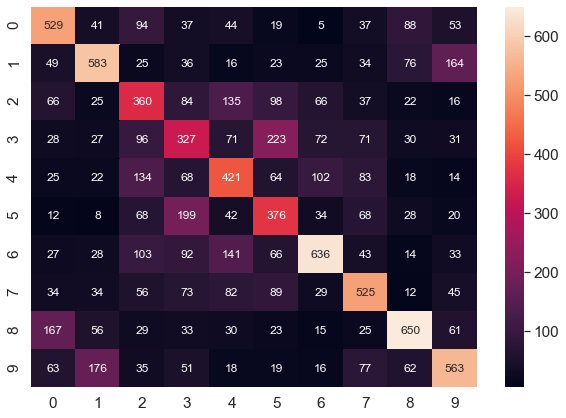

In [123]:
cm = confusion_matrix(y_pca_test_pred,y_test)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d")# font size
plt.show()

## Image label Prediction

In [159]:
def image_prediction(img):
    new_image = img.reshape(3, 32, 32).transpose(1, 2, 0)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(new_image) 
    plt.show()
    
    pca_image = pca.transform(img.reshape(1, -1))
    predict = clf_gbc.predict(pca_image)
    
    return print("Predicted label for the image is", image_label[predict[0]])

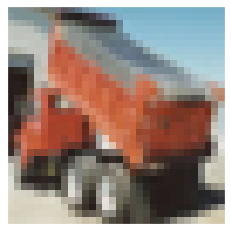

Predicted label for the image is truck


In [165]:
image_prediction(X_test[random.randint(0, 10000)])